# Tarea . Estimación de beta

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/en/f/f3/SML-chart.png" width="400px" height="400px" />

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea7_ApellidoNombre*

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Datos (10 puntos)

Bajar los índices:
     ['VTI', 'VGT', 'VTV',
     'VNQ', 'VCR',
     'VFH', 'VDC',
     'VHT', 'VIS']

Periodo de observación

2015-01-01 a 2022-01-01
     
Describir brevemente cada índice

In [2]:
tickers = ['VTI', 'VGT', 'VTV',
           'VNQ', 'VCR', 'VFH',
           'VDC', 'VHT', 'VIS']
tickers2 = ['VGT', 'VTV', 'VNQ',
            'VCR', 'VFH', 'VDC',
            'VHT', 'VIS']
start_date = '2015-01-01'
end_date = "2022-01-01"


St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
rt = St.pct_change().dropna()

St.describe()

[*********************100%%**********************]  9 of 9 completed


Ticker,VCR,VDC,VFH,VGT,VHT,VIS,VNQ,VTI,VTV
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,168.747859,127.942498,57.174235,196.044061,156.935718,125.871417,68.491313,132.709762,89.808663
std,65.311664,22.353100,14.467613,99.421597,41.042430,30.705446,11.612734,39.720852,19.721200
min,95.951248,94.467781,33.850487,86.483925,101.638466,79.371559,48.970375,80.257423,59.453953
25%,115.206890,111.931068,42.550476,110.176567,121.434704,98.091835,60.635996,97.618469,71.575531
50%,152.002548,120.615997,56.857292,170.258698,148.813293,124.095032,65.057785,126.430214,89.741409
75%,180.768013,140.064049,62.907145,244.379379,180.730133,137.529366,74.223633,148.852165,97.986549
max,347.858246,189.104507,95.446335,457.672974,259.314758,200.087692,106.209030,234.504684,138.924774


# 2. Mostrar todos en una gráfica normalizada (20 puntos)

Mostrar los índices anteriores en una gráfica normalizada (como la que vimos en clase) y hacer comentarios de la misma


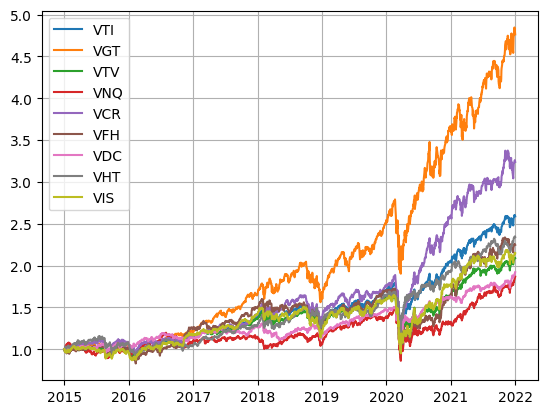

In [3]:
normalized = pd.DataFrame()

for i in tickers:
    normalized[i] = St[i] / St[i].iloc[0]
    plt.plot(normalized[i], label=i)
plt.legend()
plt.grid()

Desde el 2015 hasta el 2022 el ETF que presentó un mayor rendimiento es VGT de más del 450%, minetras que el de menor rendimiento en el mismo tiempo es VNQ con un rendimiento un poco menor del 200%. VCR también mostró un rendimiento sobresaliente, no obstante el resto muestran un rendimiento parecido desde aproximadamente 180% hasta 250%.

# 3. Estimar el beta de VTI y cada uno de los índices (40 puntos)

Grafica acción vs indice y las predicciones

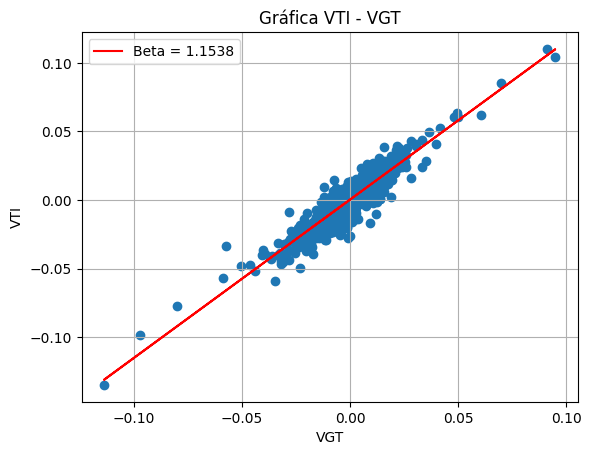

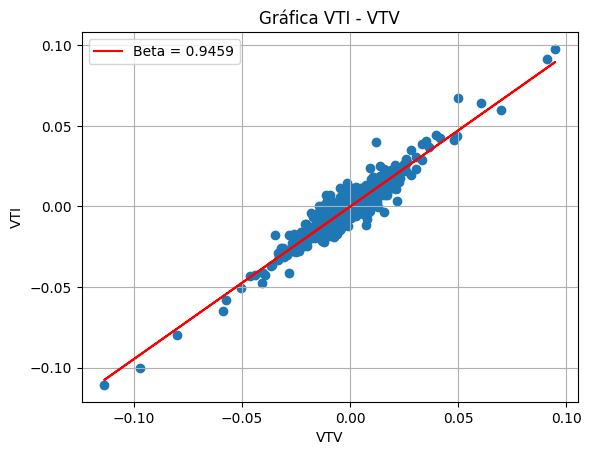

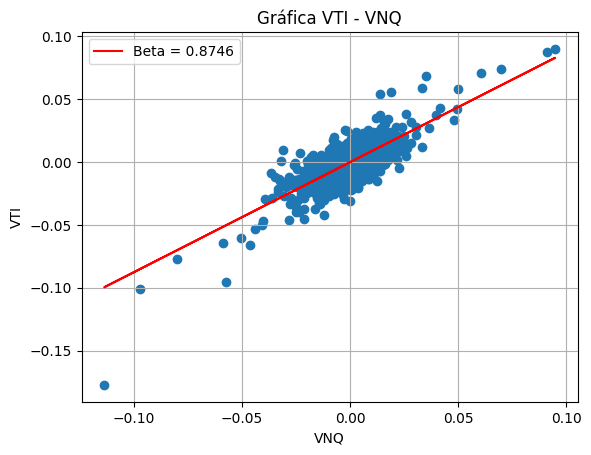

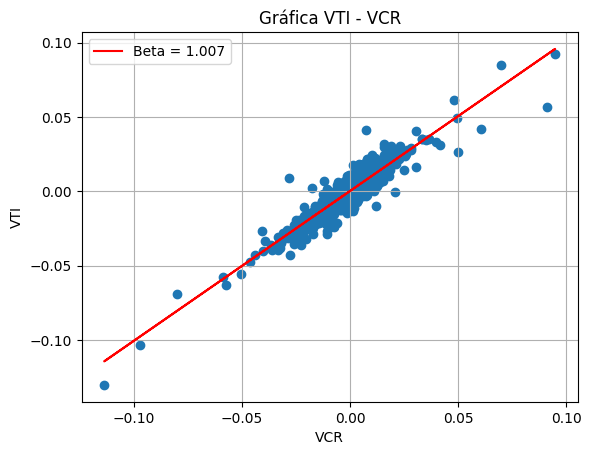

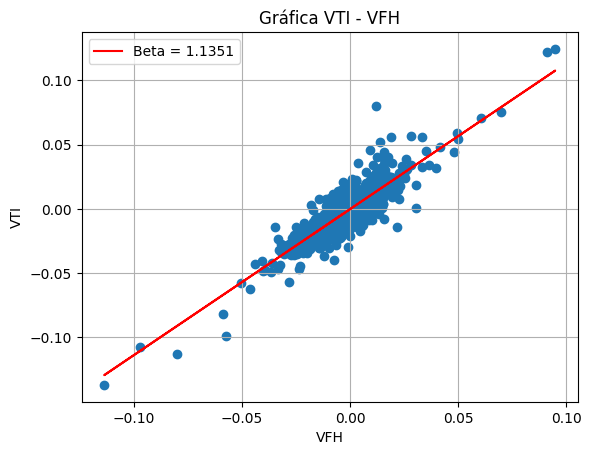

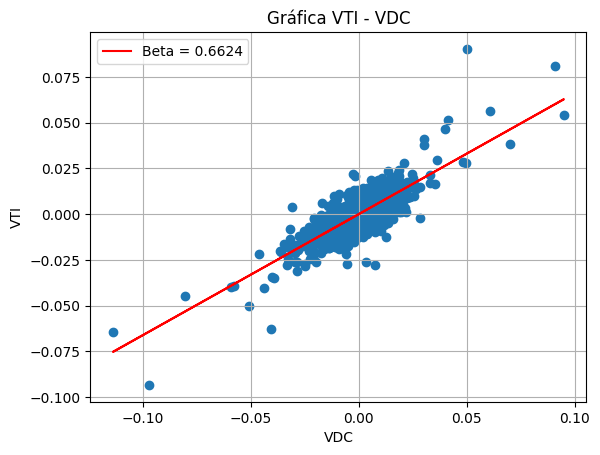

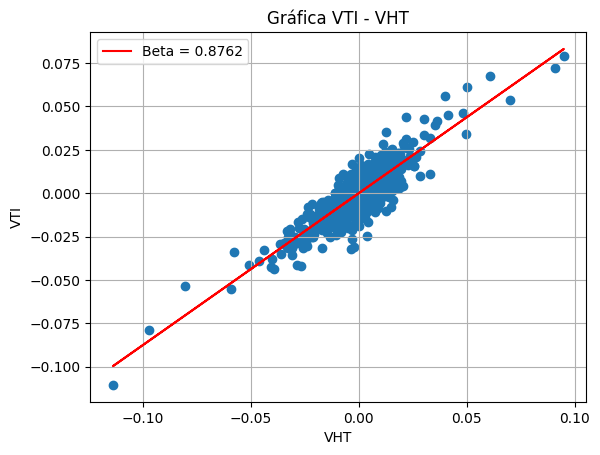

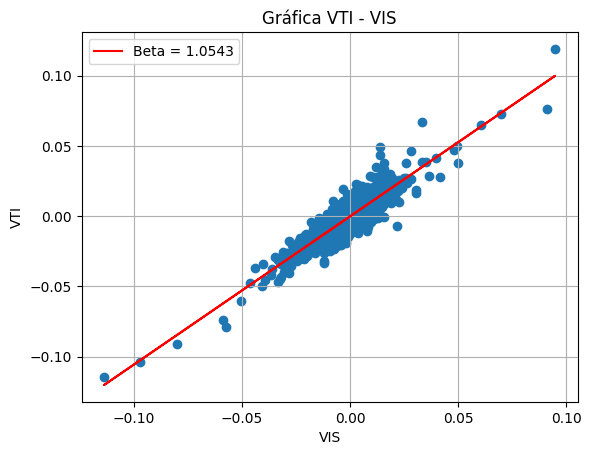

In [4]:
betas = []
prediction = []

model = LinearRegression()
X = rt[["VTI"]]

for i in tickers2:
    y = rt[[i]]

    model.fit(X, y)
    predictions = model.predict(X)

    betas.append(model.coef_[0][0])
    prediction.append(predictions)

    plt.figure()
    plt.title("Gráfica VTI - " + i)
    plt.scatter(X, y)
    plt.plot(X, predictions, color="red", label=("Beta = " + str(np.round(model.coef_[0][0], 4))))
    plt.xlabel(i)
    plt.ylabel("VTI")
    plt.legend()
    plt.grid()

# 4. Gráfico de beta vs rendimiento así como modelo de predicción de Beta vs rendimiento (30 puntos)

In [5]:
beta = pd.DataFrame({
    "beta": betas,
    "predictions": prediction
}, index=[tickers2])

beta

,beta,predictions
VGT,1.153836,"[[-0.01953669271033016], [-0.01101606891224737..."
VTV,0.945905,"[[-0.016343091674431875], [-0.0093579564336508..."
VNQ,0.874598,"[[-0.015114238011333962], [-0.0086556749380696..."
VCR,1.006963,"[[-0.017167319614652753], [-0.0097312924306348..."
VFH,1.135095,"[[-0.019620954866689508], [-0.0112387278165641..."
VDC,0.662399,"[[-0.011366899178666819], [-0.0064753443848266..."
VHT,0.876199,"[[-0.015037037691833278], [-0.0085666562658109..."
VIS,1.054303,"[[-0.0182343520569747], [-0.010448741661907703..."


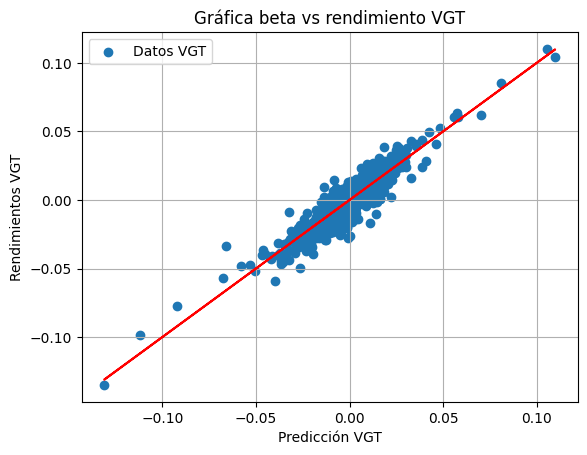

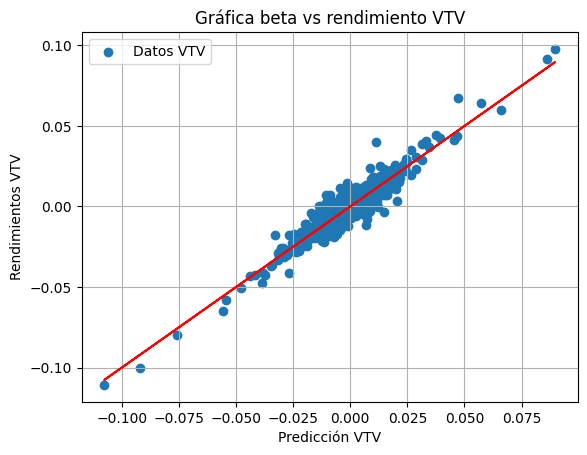

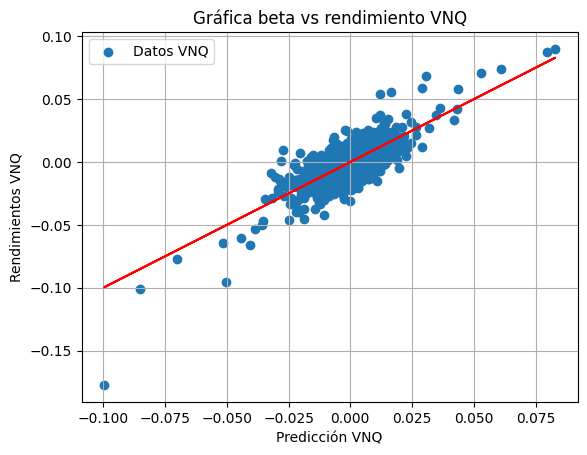

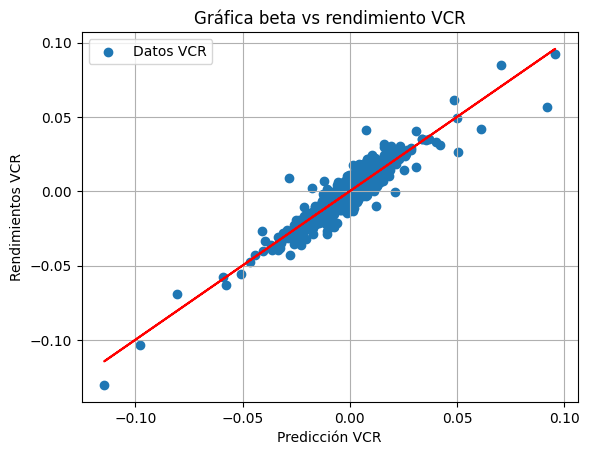

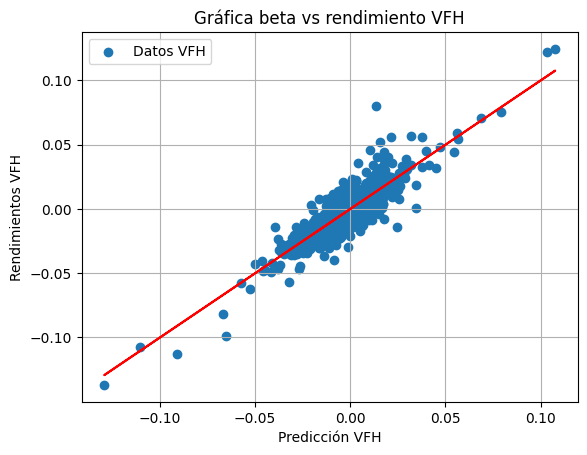

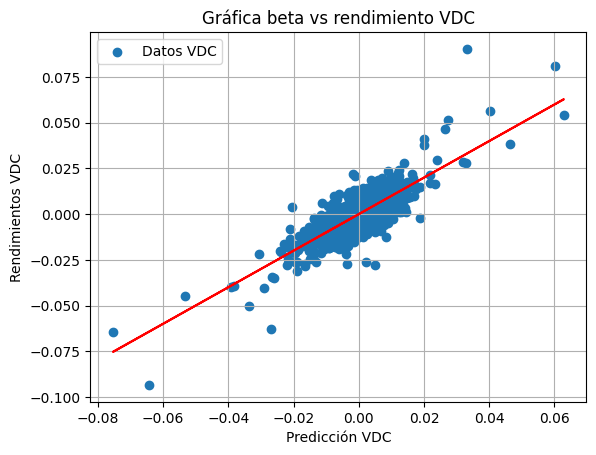

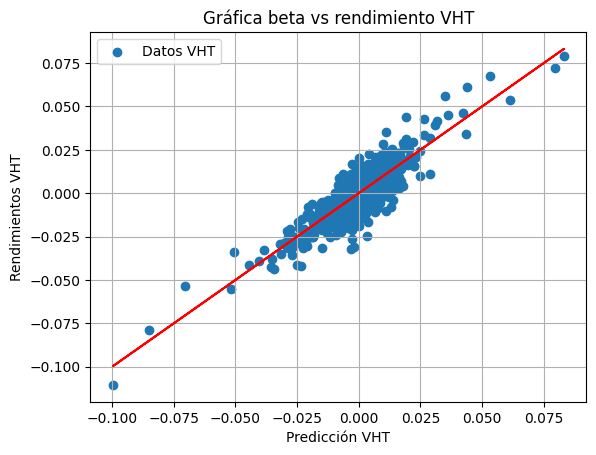

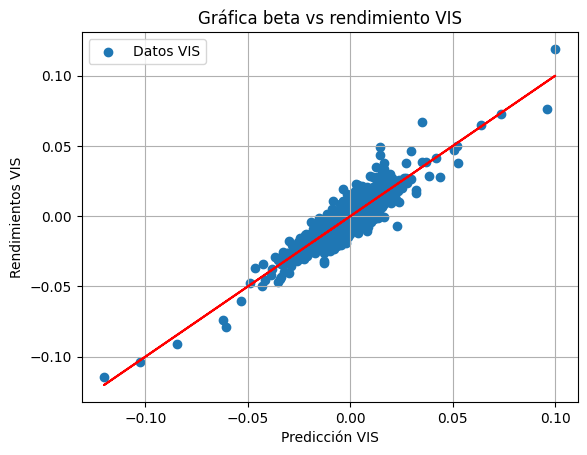

In [6]:
for i in tickers2:
    X = beta["predictions"][i]
    y = rt[[i]]

    model.fit(X, y)
    predictions = model.predict(X)

    plt.figure()
    plt.scatter(X, y, label="Datos " + i)
    plt.plot(X, predictions, color="red")
    plt.xlabel("Predicción " + i)
    plt.ylabel("Rendimientos " + i)
    plt.title("Gráfica beta vs rendimiento " + i)
    plt.legend()
    plt.grid()


Se puede ver que en todas las gráficas se cumple el hecho de que mientras más alta sea la beta se espera un mayor rendimiento. La pendiente de la linea de ajuste entre las betas y los rendimientos es diferente en cada uno de los ETFs, en donde los que tienen una beta mayor muestran una pendiente más inclinada.